<a href="https://colab.research.google.com/github/AlejandroPinto5/KNN-algorithm/blob/main/Simple_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K-Nearest Neighbour Classification algorithm**

Model to predict survived people based on the features of the person. This dataset is a clean version of the Titanic dataset and looking the best k with elbow method. Evaluation metric F1 is used.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Dataset
url = 'https://raw.githubusercontent.com/AlejandroPinto5/KNN-algorithm/main/data_cleaned.csv'
df = pd.read_csv(url)
df

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
888,0,29.699118,23.4500,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,1,26.000000,30.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [3]:
df.describe()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.682379,0.234568,...,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122,0.188552,0.086420,0.725028
std,0.486592,13.002015,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.465813,0.423966,...,0.426747,0.339154,0.286037,0.074743,0.066890,0.074743,0.033501,0.391372,0.281141,0.446751
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#checking for NaN values
df.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [4]:
#Separate independetand dependent variables
x = df.drop(['Survived'], axis= 1)
y = df['Survived']

In [16]:
# Standard Scaler to normalize data (You can use this or Min Max Scaler shows below)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

xNew = ss.fit_transform(x)

In [12]:
# MinMax Scaler to normalize data

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x_scaled = scaler.fit_transform(x)
# xNew = pd.DataFrame(x_scaled, columns = x.columns)
#  xNew

In [15]:
#Split the dataset into train set and test set
from sklearn.model_selection import train_test_split

train_xNew, test_xNew, train_y, test_y = train_test_split(xNew, y, random_state = 96, stratify = y) 

In [70]:
#KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import f1_score

clasfr = knn(n_neighbors = 1) #Neighbours (1 is a test, it will know the best in elbow method)

clasfr.fit(train_xNew, train_y)  #fitting

train_predict = clasfr.predict(train_xNew) #Predicting over train set
k1 = f1_score(train_predict, train_y) #CalculatingF1
print('Train F1 score: ', k1) #Metric evaluation

test_predict = clasfr.predict(test_xNew) #Predicting over train set
k2 = f1_score(test_predict, test_y)  # Calculating F1
print('Test F1 Score: ', k2) # High value, better the model

Train F1 score:  0.9766536964980544
Test F1 Score:  0.7011494252873564


The result above is memorizing (overfitted), difference between f1 train and F1 test is wide, so we can reduce to obtain a better result changing n_neigghbour to optime number:

In [24]:
#Elbow method
def elbow(k):
  train_error = []
  test_error = []

  for i in k:
    clasfr = knn(n_neighbors = i)
    clasfr.fit(train_xNew, train_y)

    tmpl = clasfr.predict(train_xNew)
    tmpl = f1_score(tmpl, train_y)
    train_error.append(tmpl)

    tmp = clasfr.predict(test_xNew)
    tmp = f1_score(tmp, test_y)
    test_error.append(tmp)

  return train_error, test_error

In [26]:
k = range(1,150)
train_error, test_error = elbow(k)#Calling above defined function
score = pd.DataFrame({'train score': train_error, 'test score': test_error}, index = k)
score

,train score,test score
1,0.976654,0.701149
2,0.804651,0.595745
3,0.819277,0.708075
4,0.773034,0.628571
5,0.774327,0.675497
...,...,...
145,0.552632,0.517241
146,0.552632,0.517241
147,0.552632,0.517241
148,0.552632,0.517241


Text(0.5, 1.0, 'Elbow curve for test')

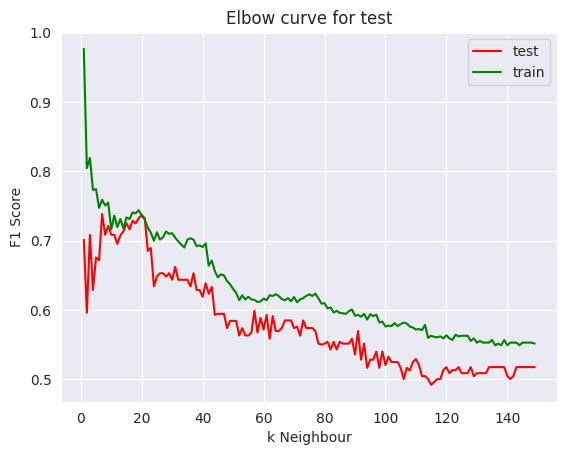

In [55]:
#Plotting k values with f1score
sb.set_style("darkgrid")
plt.plot(k,test_error, color = 'red', label = 'test')
plt.plot(k,train_error, color = 'green', label = 'train')
plt.xlabel('k Neighbour')
plt.ylabel('F1 Score')
plt.legend()

# sb.regplot(x = k,y = train_error, color = 'black')#, height=8.27, aspect=11.7/8.27)
# sb.regplot(x = k,y = test_error, color = 'red')#, height=8.27, aspect=11.7/8.27)
# set_axis_labels('K-neighbours', 'Test error')
plt.title('Elbow curve for test')
# fig.set(xticks = range(1,150,10))

**Conclusion:** If we use large k number, the model is less learning (underfitted) obtaining f1 scores of 0.56 and 0.49 for 115 k number.If we use small k number, the model is memorizing (overfitted) obtaining f1 socre of 0.97 and 0.70 for 1 k number. The best k number is 21 obtaining a f1 socre of 0.73 for both cases.